### Compute the stationary distribution of the model

Proof of concept of the stationary distribution of the model. Does not make use of CompEcon code, or rely on linear basis matrices. 

Works, but still more to do. 

- Need to generalize the code to take models with any number of Markov states and state variables.

In [4]:
# Setup
import numpy as np
import scipy.sparse as spa
import matplotlib.pyplot as plt
from dolo.algos.dtmscc.time_iteration import time_iteration
from dolo import yaml_import
from dolo import pcat
from dolo.algos.dtmscc.distributions import stat_dist
from dolo.algos.dtmscc.distributions import solve_eqm

In [12]:
filename = 'incomplete_markets_dtmscc.yaml'
model = yaml_import(filename)

Ne = 2
Nkf = 1000

### Now compute the equilibrium interest rate 

In [6]:
K = solve_eqm(model, Kinit=38, tolKeq=1e-5, verbose=True)

Iteration = 	0: K=	38.0000  Kagg=	98.7958

Iteration = 	1: K=	38.0000  Kagg=	98.7958

Iteration = 	2: K=	38.3040  Kagg=	86.1311

Iteration = 	3: K=	38.7811  Kagg=	35.4963

Iteration = 	4: K=	38.7320  Kagg=	36.6038

Iteration = 	5: K=	38.6898  Kagg=	37.6879

Iteration = 	6: K=	38.6650  Kagg=	38.3976

Iteration = 	7: K=	38.6571  Kagg=	38.6384

Iteration = 	8: K=	38.6564  Kagg=	38.6583

Iteration = 	9: K=	38.6565  Kagg=	38.6560



In [44]:
# Set model calibration to the equilibrium aggregate capital stock.
model.set_calibration(kagg=K)


drc = time_iteration(model, with_complementarities=True, verbose=False, output_type='controls') 
mdr = time_iteration(model, with_complementarities=True, verbose=False, output_type='dr') 

L, QT, kgridf = stat_dist(model, mdr, Nkf=Nkf, verbose=True)

Iteration = 0, dist = 0.370430 

Iteration = 100, dist = 0.002894 

Iteration = 200, dist = 0.001299 

Iteration = 300, dist = 0.000821 

Iteration = 400, dist = 0.000591 

Iteration = 500, dist = 0.000459 

Iteration = 600, dist = 0.000373 

Iteration = 700, dist = 0.000308 

Iteration = 800, dist = 0.000257 

Iteration = 900, dist = 0.000215 

Iteration = 1000, dist = 0.000180 

Iteration = 1100, dist = 0.000151 

Iteration = 1200, dist = 0.000127 

Iteration = 1300, dist = 0.000106 

Iteration = 1400, dist = 0.000089 

Iteration = 1500, dist = 0.000075 

Iteration = 1600, dist = 0.000063 

Iteration = 1700, dist = 0.000053 

Iteration = 1800, dist = 0.000044 

Iteration = 1900, dist = 0.000037 

Iteration = 2000, dist = 0.000031 

Iteration = 2100, dist = 0.000026 

Iteration = 2200, dist = 0.000022 

Iteration = 2300, dist = 0.000018 

Iteration = 2400, dist = 0.000015 

Iteration = 2500, dist = 0.000013 

Iteration = 2600, dist = 0.000011 

Iteration = 2700, dist = 0.000009 

Iter

### Plot the equilibrium stationary distribution and decision rules

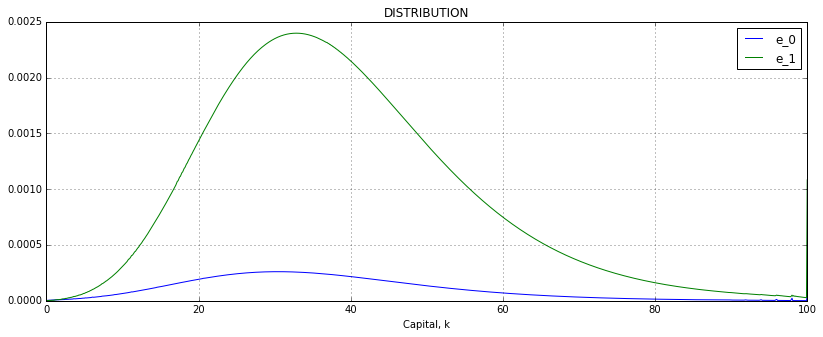

In [14]:
%matplotlib inline

L = L.reshape(2, Nkf).T

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(kgridf, L[:,0],label='e_0')
plt.plot(kgridf, L[:,1],label='e_1')
plt.xlabel('Capital, k')
plt.title('DISTRIBUTION')
plt.legend()
plt.grid()

In [45]:
# Get kprime and consumption from the markov decision rule
from dolo.algos.dtmscc.distributions import mdr_to_sprime

kgridf, kprimef = mdr_to_sprime(model, mdr, Nkf, Ne)
mdrc = np.zeros([Nkf, Ne])
for i_m in range(Ne):
    mdrc[:, i_m] = mdr(i_m, kgridf.reshape(-1,1)).flatten()

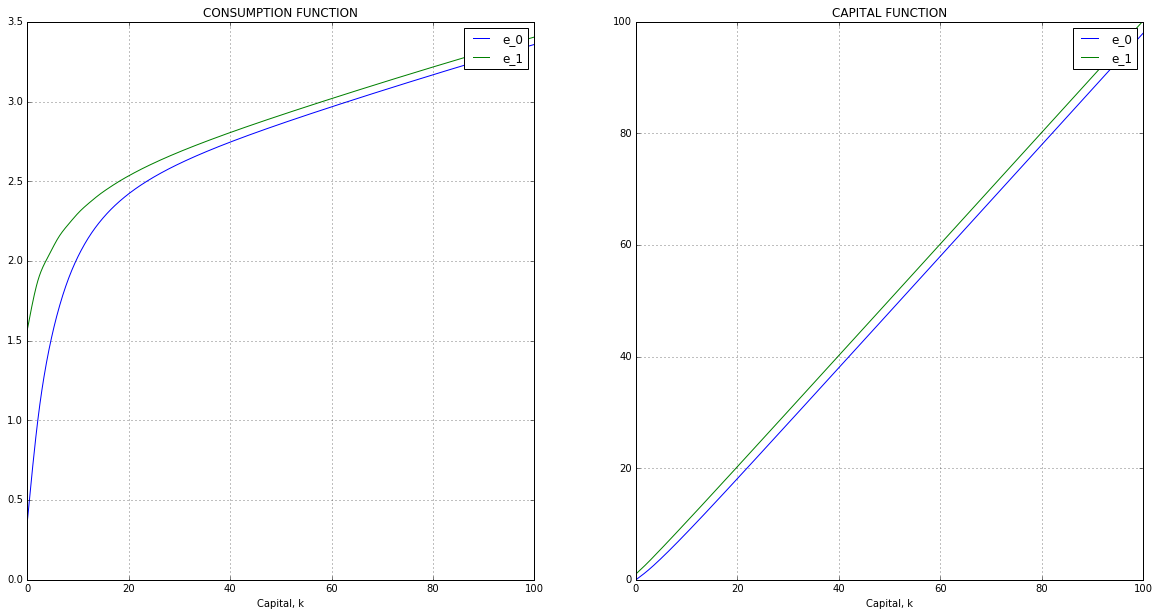

In [52]:
# Plot controls

%matplotlib inline
kgrid = mdr.grid

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(kgridf, mdrc[:,0],label='e_0')
plt.plot(kgridf, mdrc[:,1],label='e_1')
plt.xlabel('Capital, k')
plt.title('CONSUMPTION FUNCTION')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(kgridf, kprimef[:Nkf],label='e_0')
plt.plot(kgridf, kprimef[Nkf:],label='e_1')
plt.xlabel('Capital, k')
plt.title('CAPITAL FUNCTION')
plt.legend()
plt.grid()

# plt.subplot(121)
# plt.plot(kgridf, drc[0,:],label='e_0')
# plt.plot(kgridf, drc[1,:],label='e_1')
# plt.xlabel('Capital, k')
# plt.title('CONSUMPTION FUNCTION')
# plt.legend()
# plt.grid()

#### Create a function that takes transition back to control

For models in which we can use the $s_{t+1}$ trick, need to create a function that takes this transition rule back to the control. 